In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),# 0-255 to [0,1) 
    transforms.Normalize((0.5,),(0.5,))#[0,1) to [-1,1]
])

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

In [3]:
len(training_data)

60000

In [7]:
len(test_data)

10000

In [9]:
image,label=training_data[59999]

In [11]:
label

8

In [13]:
image.shape

torch.Size([1, 28, 28])

In [15]:
image

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

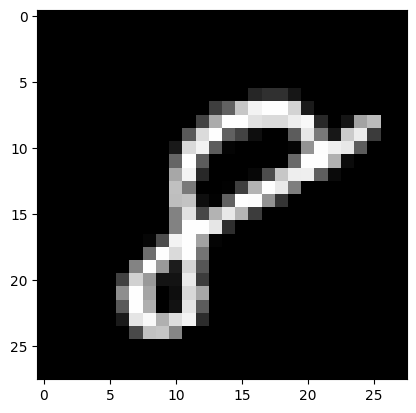

In [17]:
plt.imshow(image.squeeze(),cmap="gray")

In [18]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

In [21]:
data_iter = iter(train_dataloader)

In [23]:
image,label = next(data_iter)

In [25]:
image.squeeze().shape

torch.Size([64, 28, 28])

In [27]:
label.shape

torch.Size([64])

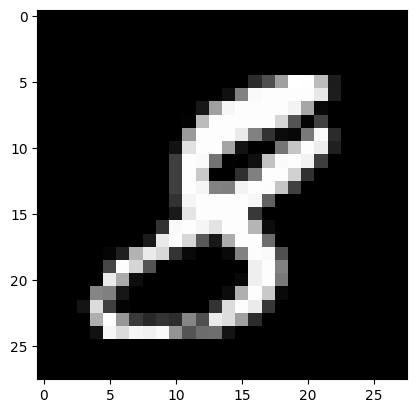

In [29]:
plt.imshow(image[63].squeeze(),cmap="gray")

In [31]:
label[63]

tensor(8)

In [33]:
import torch.nn as nn
import torch.optim as optim

In [35]:
class DigitClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784,128), # 784 -> 128 hidden neurons (hidden Layer 1)
            nn.ReLU(),           
            nn.Linear(128,64), # 128 -> 64 hidden neurons (hidden Layer 2)
            nn.ReLU(),
            nn.Linear(64,10) # 64 -> 10 output neurons(output layer)
        )
    def forward(self,x):
        return self.network(x)

In [37]:
model = DigitClassifier()
optimizer = optim.RMSprop(model.parameters(),lr= 0.001)
criterion = nn.CrossEntropyLoss()

In [39]:
epochs = 2
for epoch in range(epochs):
    losses = 0.0
    for image,label in train_dataloader:
        
        # forward pass
        output = model(image)
        loss = criterion(output,label)
        losses+=loss.item()
        
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        
        # weights update
        optimizer.step()
    print(f"for epoch {epoch} : loss is {(losses/937.5):0.2f}")

for epoch 0 : loss is 0.40
for epoch 1 : loss is 0.21


In [193]:
model.eval()
total = 0 
correct = 0 
with torch.no_grad():
    for images,labels in test_dataloader:
        out = model(images)
        _,predicted = torch.max(out.data,1)
        pred_count =(predicted == labels).sum().item()
        correct +=pred_count
        total += labels.size(0)
print("Accuracy is :",(correct)*100/(total))

Accuracy is : 94.11


In [201]:
from sklearn.metrics import confusion_matrix, classification_report
import torch

# Make sure your model is in eval mode
model.eval()

all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_dataloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        # store predictions and labels
        all_labels.extend(labels.tolist())
        all_preds.extend(predicted.tolist())

# Compute accuracy
correct = sum([p == t for p, t in zip(all_preds, all_labels)])
total = len(all_labels)
accuracy = 100 * correct / total
print(f"Accuracy: {accuracy:.2f}%")

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(all_labels, all_preds, digits=4)
print("Classification Report:")
print(report)


Accuracy: 94.11%
Confusion Matrix:
[[ 968    0    1    5    0    3    1    1    1    0]
 [   0 1101    4    8    0    0    6    1   15    0]
 [   7    1  987   18    4    0    4    6    4    1]
 [   0    0    6  990    0    2    0    6    3    3]
 [   1    0    7    1  945    1    7    2    2   16]
 [  10    1    3   85    2  761   12    2   13    3]
 [  11    3    6    3    6    8  918    0    3    0]
 [   2    7   23   21    6    0    0  956    0   13]
 [   9    1    9   55    5    3   14    6  868    4]
 [   8    5    1   26   37    4    1    7    3  917]]
Classification Report:
              precision    recall  f1-score   support

           0     0.9528    0.9878    0.9699       980
           1     0.9839    0.9700    0.9769      1135
           2     0.9427    0.9564    0.9495      1032
           3     0.8168    0.9802    0.8911      1010
           4     0.9403    0.9623    0.9512       982
           5     0.9731    0.8531    0.9092       892
           6     0.9533    0.958

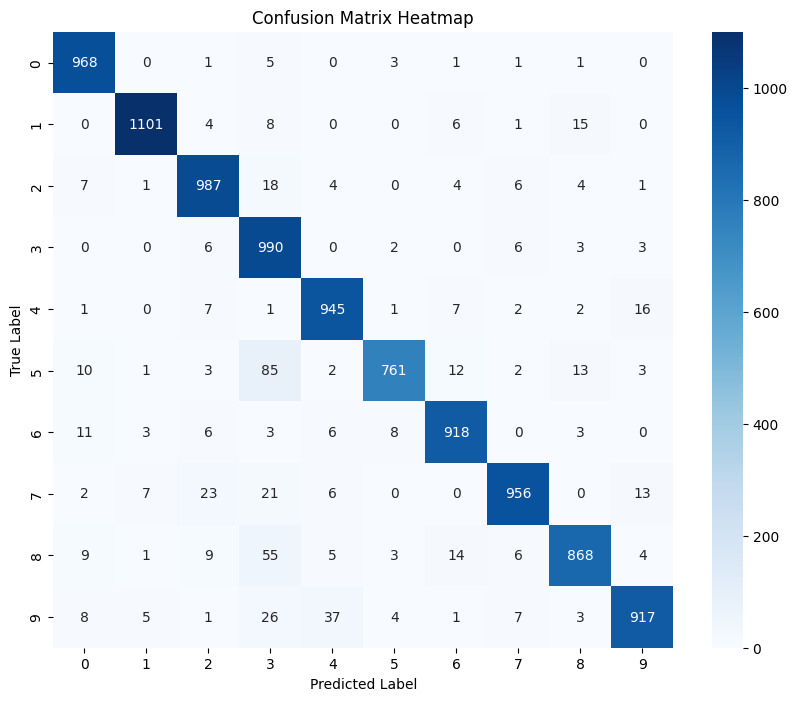

Classification Report:
               precision    recall  f1-score   support

           0     0.9528    0.9878    0.9699       980
           1     0.9839    0.9700    0.9769      1135
           2     0.9427    0.9564    0.9495      1032
           3     0.8168    0.9802    0.8911      1010
           4     0.9403    0.9623    0.9512       982
           5     0.9731    0.8531    0.9092       892
           6     0.9533    0.9582    0.9558       958
           7     0.9686    0.9300    0.9489      1028
           8     0.9518    0.8912    0.9205       974
           9     0.9582    0.9088    0.9329      1009

    accuracy                         0.9411     10000
   macro avg     0.9441    0.9398    0.9406     10000
weighted avg     0.9443    0.9411    0.9413     10000



In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming all_labels and all_preds are already collected
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=[0,1,2,3,4,5,6,7,8,9],
            yticklabels=[0,1,2,3,4,5,6,7,8,9])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Classification report
report = classification_report(all_labels, all_preds, digits=4)
print("Classification Report:\n", report)
